In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

import os
print(os.listdir("./input"))

['products.csv', 'order_products__train.csv', 'aisles.csv', 'departments.csv', 'orders.csv', 'order_products__prior.csv', 'sample_submission.csv']


In [2]:
aisles_data = pd.read_csv("./input/aisles.csv")
departments_data = pd.read_csv("./input/departments.csv")
order_products_train_data = pd.read_csv("./input/order_products__train.csv")
order_products_prior_data = pd.read_csv("./input/order_products__prior.csv")
orders_data = pd.read_csv("./input/orders.csv")
products_data = pd.read_csv("./input/products.csv")

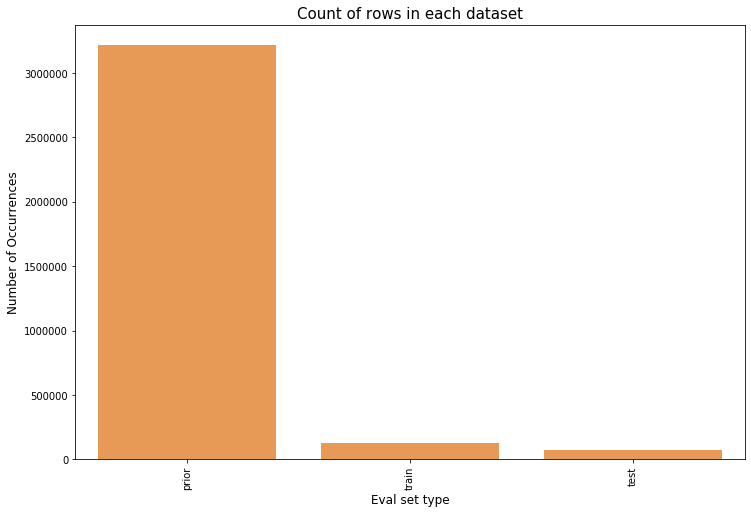

In [3]:
cnt_srs = orders_data.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [4]:
data = orders_data.groupby("eval_set")["user_id"]
data_cnt = data.size()
data = 0
print(data_cnt)
print("Total customer: ", len(orders_data.groupby("user_id")))

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64
Total customer:  206209


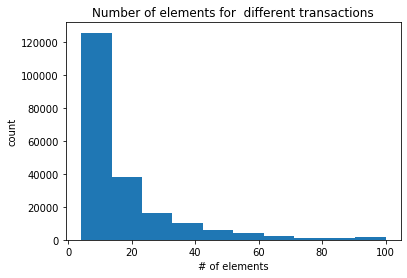

min number of element:  4
max number of element:  100


In [5]:
transactions = orders_data.groupby("user_id")["eval_set"].size()
plt.hist(transactions)
plt.title("Number of elements for  different transactions")
plt.xlabel("# of elements")
plt.ylabel("count")
plt.show()
print("min number of element: ", min(transactions))
print("max number of element: ", max(transactions))
transactions = 0

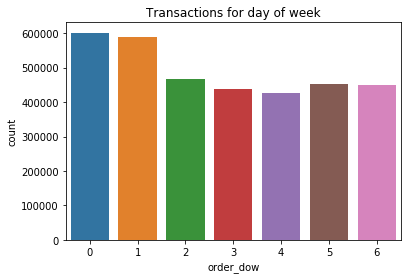

In [6]:
sns.countplot(x="order_dow", data = orders_data)
plt.title("Transactions for day of week")
plt.show()

## Checking the variety in Dataset

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


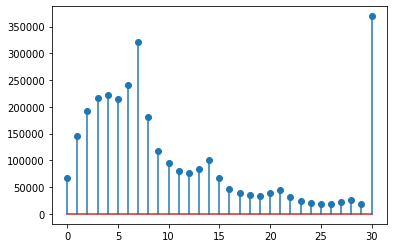

In [7]:
frequent_order_time_period = orders_data.groupby("days_since_prior_order")["user_id"].count()
plt.stem(frequent_order_time_period)
plt.show()

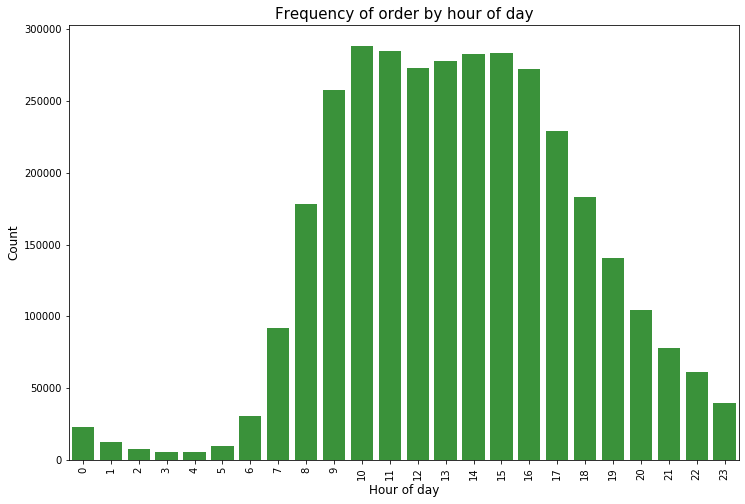

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_data, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

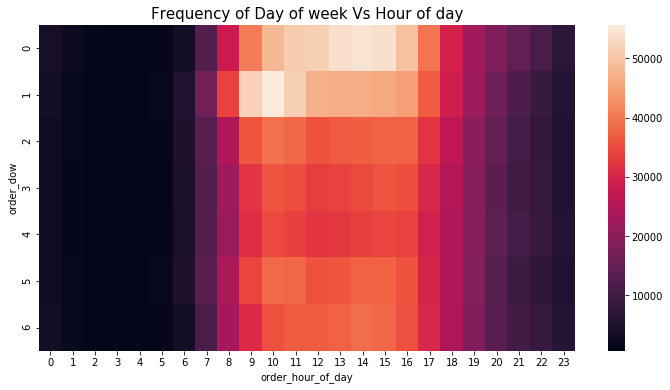

In [9]:
grouped_data = orders_data.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_data = grouped_data.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_data)
plt.title("Frequency of Day of week Vs Hour of day", fontsize=15)
plt.show()

Above graph clearly states the trend of the data, that maximum shopping is done on weekends during day time. But it also states that the data contains transactions for everyday and various hours of day. So the data set has sufficient transactions with variety.

## Analysing the Reorder attribute in the dataset

In [10]:
order_products_prior_data.reordered.sum() / order_products_prior_data.shape[0]

0.5896974667922161

In [11]:
order_products_train_data.reordered.sum() / order_products_train_data.shape[0]

0.5985944127509629

In [12]:
grouped_data = order_products_prior_data.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_data["reordered"].loc[grouped_data["reordered"]>1] = 1
grouped_data.reordered.value_counts() / grouped_data.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [13]:
grouped_data = order_products_train_data.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_data["reordered"].loc[grouped_data["reordered"]>1] = 1
grouped_data.reordered.value_counts() / grouped_data.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

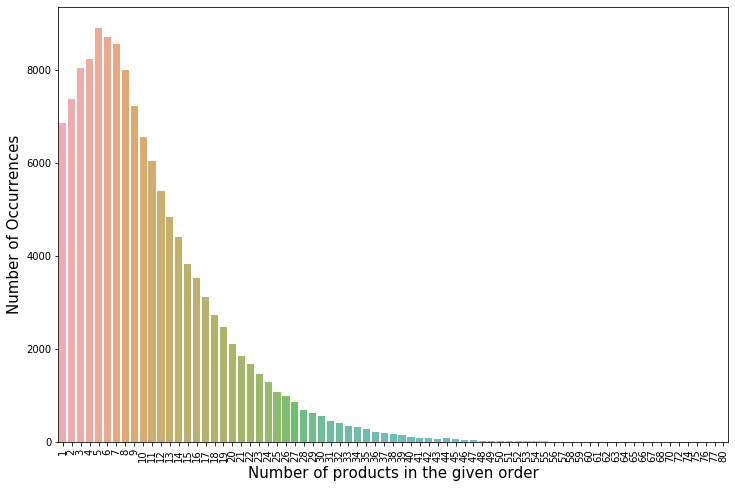

In [14]:
grouped_data = order_products_train_data.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_data.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Number of products in the given order', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
order_products_train__data = pd.merge(order_products_train_data, products_data, on='product_id', how='left')
order_products_train__data = pd.merge(order_products_train__data, aisles_data, on='aisle_id', how='left')
order_products_train__data = pd.merge(order_products_train__data, departments_data, on='department_id', how='left')
order_products_train__data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [16]:
cnt_srs = order_products_train__data['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


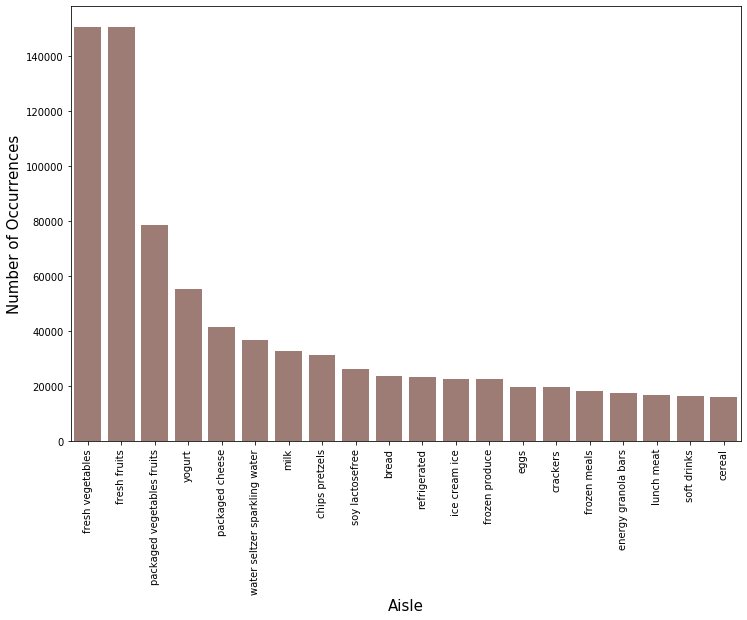

In [17]:
cnt_srs = order_products_train__data['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Aisle', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

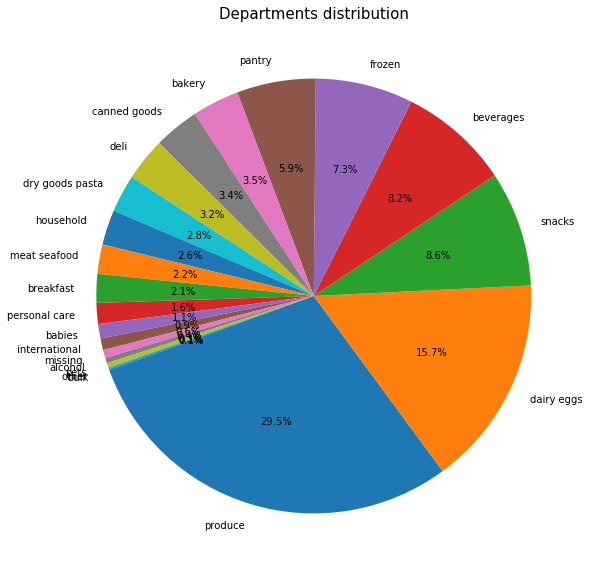

In [18]:
plt.figure(figsize=(10,10))
temp_series = order_products_train__data['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

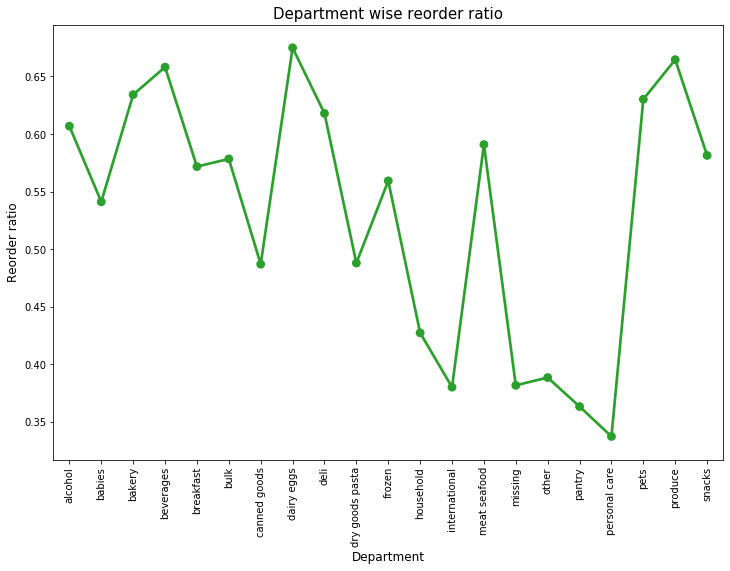

In [19]:
grouped_data = order_products_train__data.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['department'].values, grouped_data['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

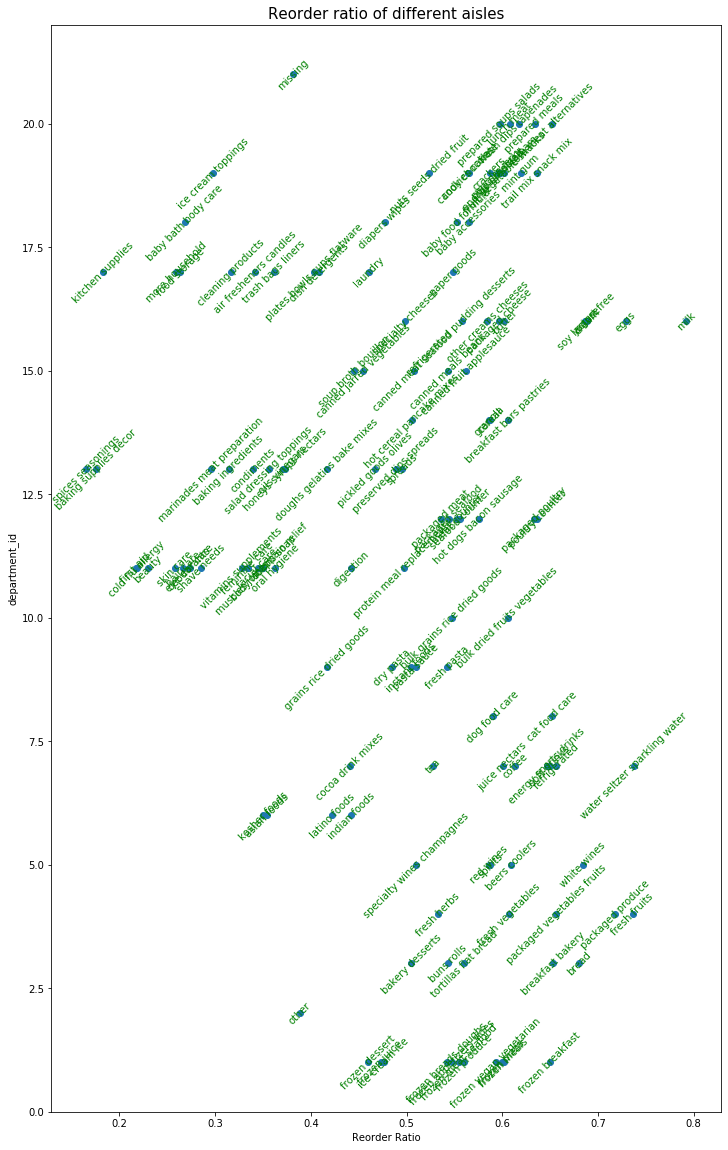

In [20]:
grouped_data = order_products_train__data.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_data.reordered.values, grouped_data.department_id.values)
for i, txt in enumerate(grouped_data.aisle.values):
    ax.annotate(txt, (grouped_data.reordered.values[i], grouped_data.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()


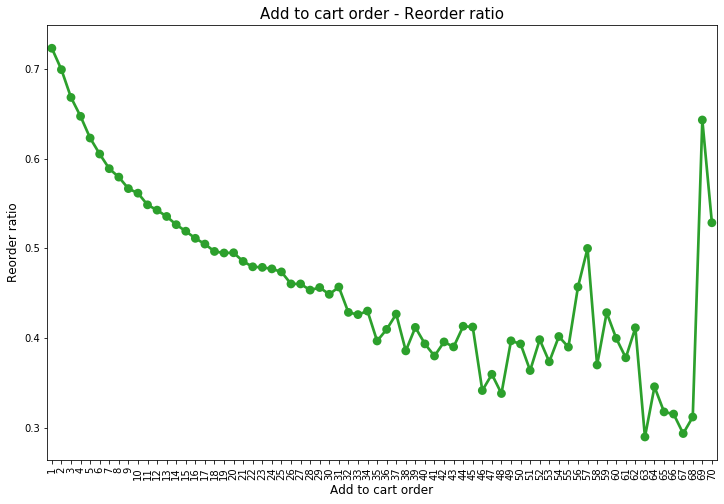

In [21]:
order_products_train__data["add_to_cart_order_mod"] = order_products_train__data["add_to_cart_order"].copy()
order_products_train__data["add_to_cart_order_mod"].loc[order_products_train__data["add_to_cart_order_mod"]>70] = 70
grouped_data = order_products_train__data.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_data['add_to_cart_order_mod'].values, grouped_data['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## Exploring according to Add to cart
The data set also has another feature of add to cart data, Generally people tend to add to cart the items which they order regularly and are their mostly ordered products. As we already discussed the maximum orders has 4 items, Hence in the data set the add to cart has most number of 1 items and them the frequency for more number of items goes on decreasing. There are few more high ratio data where the add to cart number of items is around 50 that can be because we might less data with orders with that much items in order hence there are high frequency values in that range in the reorder ratio.

In [22]:
order_products_train__data = pd.merge(order_products_train__data, orders_data, on='order_id', how='left')
grouped_data = order_products_train__data.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()
grouped_data.head()

,order_dow,reordered
0,0,0.609624
1,1,0.598977
2,2,0.588365
3,3,0.586724
4,4,0.594632


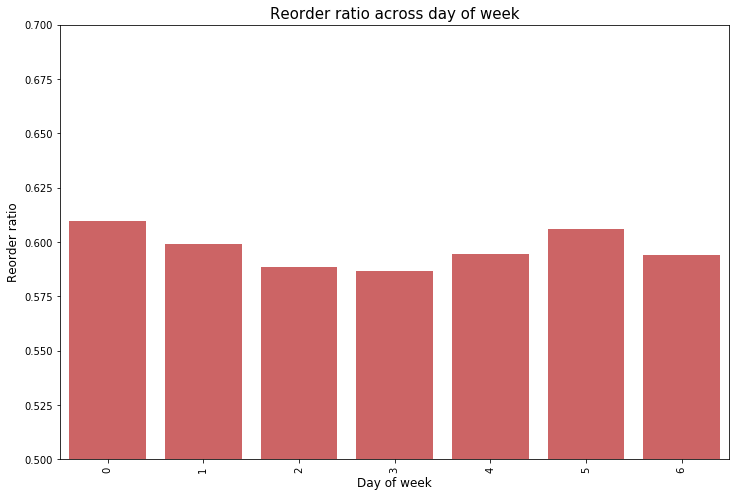

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(grouped_data['order_dow'].values, grouped_data['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()


## References

https://www.datacamp.com/community/tutorials/kaggle-machine-learning-eda

https://medium.com/@gaurang.swarge/eda-of-instacart-dataset-c03c8097143d

https://www.kaggle.com/lockheed/future-transaction-prediction-on-instacart-dataset/notebook

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
